In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = yf.Ticker('BTC-USD').history(period='Max')

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,63615990033,0,0
2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,67760757880,0,0
2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,57706187875,0,0


In [12]:
data = df.filter(['Close'])
data

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-01-14,39187.328125
2021-01-15,36825.367188
2021-01-16,36178.140625


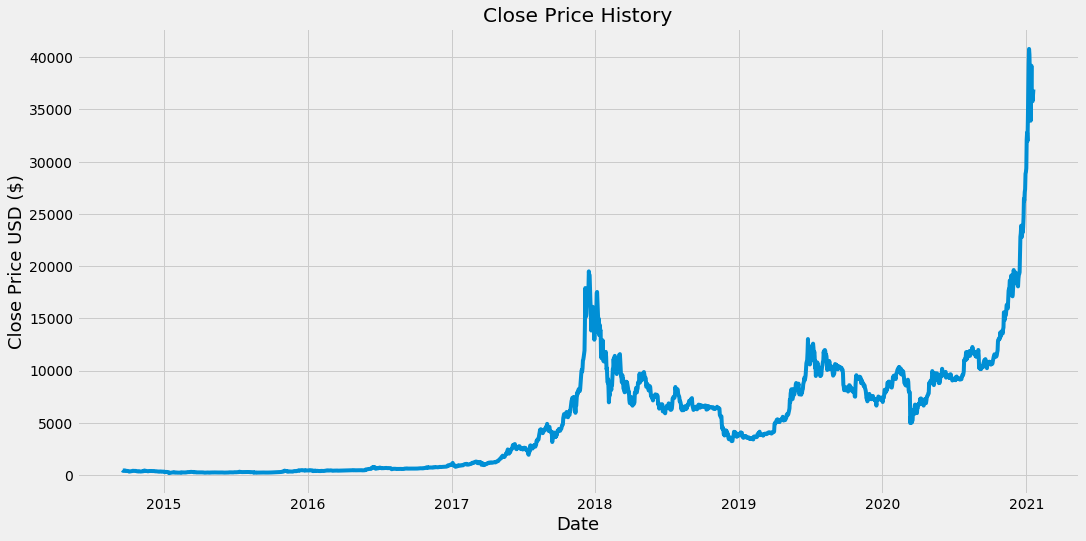

In [13]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
# Convert dataframe to numpy array
dataset = data.values

In [15]:
dataset

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [36178.140625  ],
       [35791.27734375],
       [36916.94140625]])

In [16]:
df1=scaler.fit_transform(np.array(dataset).reshape(-1,1))

In [60]:
print(df1)

[[0.00687431]
 [0.0060645 ]
 [0.0053347 ]
 ...
 [0.88627462]
 [0.87675054]
 [0.90446295]]


In [52]:
df1[0:training_size,:]

array([[0.00687431],
       [0.0060645 ],
       [0.0053347 ],
       ...,
       [0.20700327],
       [0.20048628],
       [0.20085061]])

In [36]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [62]:
training_size, test_size

(1852, 464)

In [65]:
len(train_data), len(test_data)

(1852, 464)

In [66]:
train_data

array([[0.00687431],
       [0.0060645 ],
       [0.0053347 ],
       ...,
       [0.20700327],
       [0.20048628],
       [0.20085061]])

In [82]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [83]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
print(X_train)

[[0.00687431 0.0060645  0.0053347  ... 0.00385207 0.00355571 0.0034689 ]
 [0.0060645  0.0053347  0.00568202 ... 0.00355571 0.0034689  0.0036884 ]
 [0.0053347  0.00568202 0.00543379 ... 0.0034689  0.0036884  0.00339147]
 ...
 [0.2561585  0.26153875 0.2900864  ... 0.19227345 0.19861197 0.19819739]
 [0.26153875 0.2900864  0.27172498 ... 0.19861197 0.19819739 0.2072314 ]
 [0.2900864  0.27172498 0.2658909  ... 0.19819739 0.2072314  0.20700327]]


In [85]:
print(X_train.shape), print(y_train.shape)

(1751, 100)
(1751,)


(None, None)

In [86]:
print(X_test.shape), print(ytest.shape)

(363, 100)
(363,)


(None, None)

In [87]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [88]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 143ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 2/100
28/28 [==============================] - 3s 106ms/step - loss: 6.0007e-04 - val_loss: 0.0038
Epoch 3/100
28/28 [==============================] - 3s 104ms/step - loss: 3.9398e-04 - val_loss: 0.0050
Epoch 4/100
28/28 [==============================] - 3s 104ms/step - loss: 3.3671e-04 - val_loss: 0.0045
Epoch 5/100
28/28 [==============================] - 3s 105ms/step - loss: 2.8916e-04 - val_loss: 0.0032
Epoch 6/100
28/28 [==============================] - 3s 106ms/step - loss: 2.5174e-04 - val_loss: 0.0055
Epoch 7/100
28/28 [==============================] - 3s 106ms/step - loss: 2.7981e-04 - val_loss: 0.0043
Epoch 8/100
28/28 [==============================] - 3s 104ms/step - loss: 2.4635e-04 - val_loss: 0.0034
Epoch 9/100
28/28 [==============================] - 3s 104ms/step - loss: 2.5285e-04 - val_loss: 0.0031
Epoch 10/100
28/28 [==============================] - 3s 10

In [91]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [92]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [94]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5643.470046841075

In [95]:
math.sqrt(mean_squared_error(ytest,test_predict))

13741.205060742634

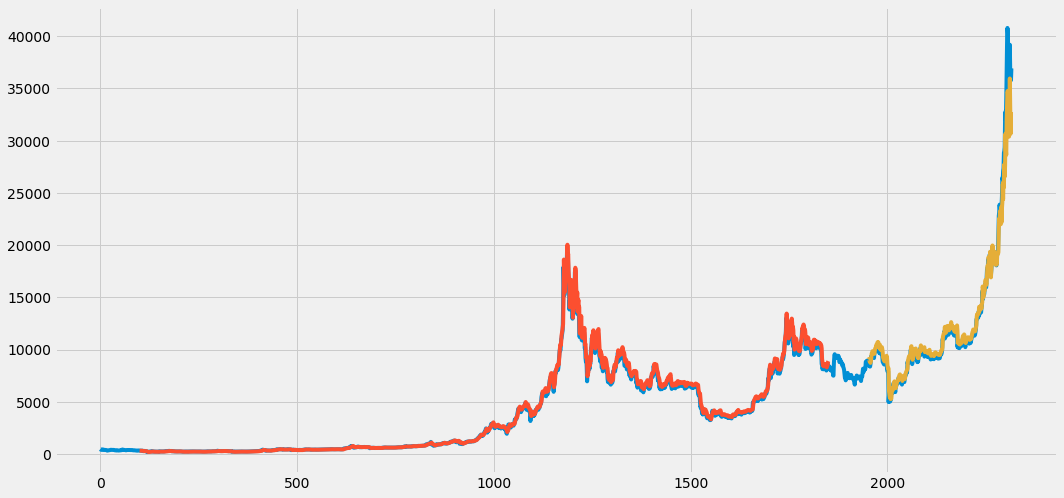

In [97]:
look_back = 100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [98]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [101]:
# predict for next 30 days
lst_output=[]
n_steps=100
i=0

while i<30:
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)    
    


0 day input [0.28009351 0.27690628 0.27699509 0.27861605 0.27435144 0.27523718
 0.27832087 0.28468918 0.28898017 0.31131807 0.31481891 0.31397319
 0.31831897 0.31642607 0.31751112 0.33176464 0.3223373  0.32643872
 0.32911329 0.33488571 0.3338053  0.32921095 0.33905379 0.34356902
 0.37917117 0.3788273  0.36080327 0.37670237 0.37307722 0.37205768
 0.38216212 0.39631798 0.39733879 0.39119224 0.38842138 0.40714449
 0.43002254 0.43392706 0.43424917 0.45404814 0.45456312 0.44786115
 0.44771637 0.46601654 0.45677606 0.41784161 0.41680219 0.43179528
 0.44312162 0.47877817 0.45852096 0.46832152 0.47433603 0.45597951
 0.46716785 0.47186733 0.4680886  0.44665835 0.45238888 0.44527595
 0.44020233 0.45853716 0.46687618 0.46944297 0.47363877 0.52025484
 0.55704909 0.56524217 0.5832599  0.57359614 0.55699788 0.58112292
 0.56778737 0.57996387 0.60283076 0.64646118 0.64240544 0.66240848
 0.66924335 0.7056425  0.70960039 0.71876918 0.78654734 0.80266658
 0.78272273 0.83246523 0.90218379 0.96487977 1.   

In [102]:
day_new=np.arange(1,101)
day_pred=np.arange(1,101)

In [103]:
len(df1)

2316

In [104]:
df3=df1.tolist()
df3.extend(lst_output)

ValueError: x and y must have same first dimension, but have shapes (100,) and (30, 1)

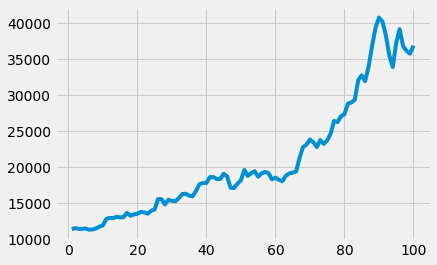

In [115]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: x and y must have same first dimension, but have shapes (100,) and (30, 1)

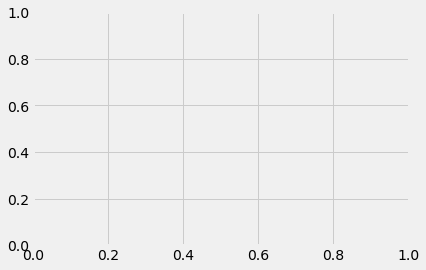

In [108]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [113]:
scaler.inverse_transform(lst_output)

array([[27639.56943989],
       [24154.60980306],
       [24233.63729533],
       [25482.60142849],
       [26145.89390838],
       [25671.52800255],
       [24448.45039086],
       [23216.87225758],
       [22450.0336918 ],
       [22155.00433838],
       [22083.87935323],
       [21993.64211588],
       [21767.42074414],
       [21414.38882854],
       [21009.49186776],
       [20626.78439158],
       [20302.77675762],
       [20035.88192746],
       [19805.24929103],
       [19589.98102658],
       [19379.17487017],
       [19172.59476343],
       [18976.09858505],
       [18796.3322854 ],
       [18637.37422637],
       [18499.96163634],
       [18382.40336911],
       [18282.05436063],
       [18196.45476188],
       [18123.84079331]])

In [114]:
scaler.inverse_transform(df1[len(df1)-100:])

array([[11384.18164062],
       [11555.36328125],
       [11425.89941406],
       [11429.50683594],
       [11495.34960938],
       [11322.12304688],
       [11358.1015625 ],
       [11483.359375  ],
       [11742.03710938],
       [11916.33496094],
       [12823.68945312],
       [12965.89160156],
       [12931.5390625 ],
       [13108.0625    ],
       [13031.17382812],
       [13075.24804688],
       [13654.21875   ],
       [13271.28515625],
       [13437.8828125 ],
       [13546.52246094],
       [13780.99511719],
       [13737.109375  ],
       [13550.48925781],
       [13950.30078125],
       [14133.70703125],
       [15579.84863281],
       [15565.88085938],
       [14833.75390625],
       [15479.56738281],
       [15332.31542969],
       [15290.90234375],
       [15701.33984375],
       [16276.34375   ],
       [16317.80859375],
       [16068.13867188],
       [15955.58789062],
       [16716.11132812],
       [17645.40625   ],
       [17804.00585938],
       [17817.08984375],


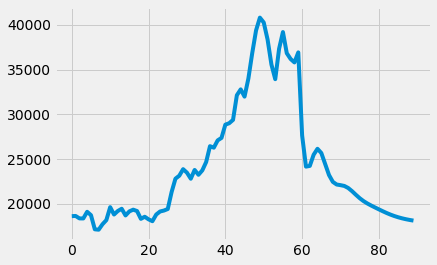

In [121]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(scaler.inverse_transform(df3[2256:]))

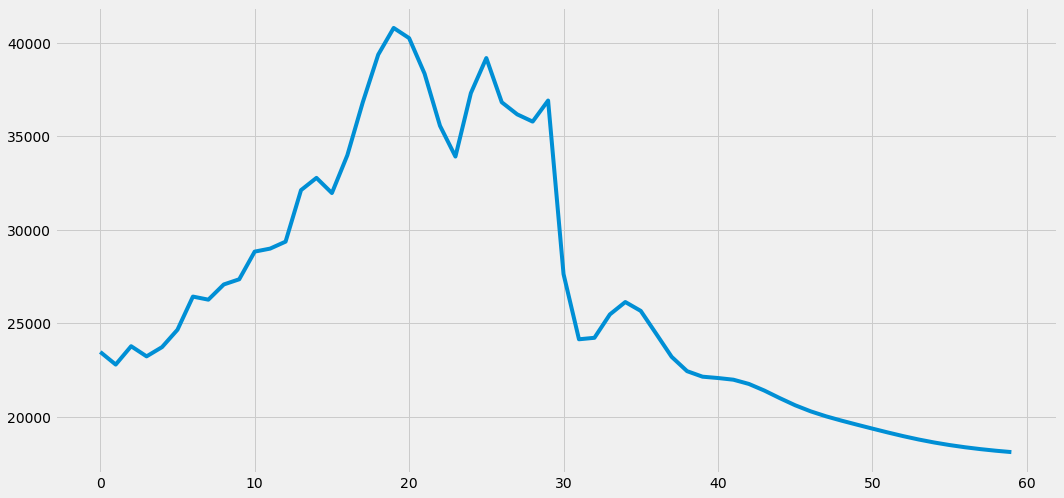

In [123]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df3[2286:]))